<a href="https://colab.research.google.com/github/chahn85/UNOS_Synthetic/blob/main/UNOS_MELD_gen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get update -y
!sudo apt-get install python3.9 -y
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.9 1
!echo 3 | sudo update-alternatives --config python3
!sudo apt-get install python3.9-distutils python3.9-dev -y
!curl https://bootstrap.pypa.io/get-pip.py -o get-pip.py
!python get-pip.py

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,317 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,610 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 https://r2u.stat.illinois.edu/ubunt

In [2]:
import os
import gdown

In [3]:
gdown.download(id="1y5O4NFLwvLtpkmE366ZhQ4yifstxLX1Q")

Downloading...
From (original): https://drive.google.com/uc?id=1y5O4NFLwvLtpkmE366ZhQ4yifstxLX1Q
From (redirected): https://drive.google.com/uc?id=1y5O4NFLwvLtpkmE366ZhQ4yifstxLX1Q&confirm=t&uuid=979a2133-0164-45ed-a791-a00dd2559ff9
To: /content/meld_gen.tar.gz
100%|██████████| 1.31G/1.31G [00:20<00:00, 62.7MB/s]


'meld_gen.tar.gz'

In [4]:
!tar -xvzf meld_gen.tar.gz

meld_gen/
meld_gen/exp/
meld_gen/exp/meld/
meld_gen/exp/meld/config.toml
meld_gen/exp/meld/check/
meld_gen/exp/meld/check/info.json
meld_gen/exp/meld/check/X_num_train.npy
meld_gen/exp/meld/check/X_cat_train.npy
meld_gen/exp/meld/check/model_ema.pt
meld_gen/exp/meld/check/y_train.npy
meld_gen/exp/meld/check/model.pt
meld_gen/exp/meld/check/config.toml
meld_gen/exp/meld/check/X_cat_unnorm.npy
meld_gen/exp/meld/check/X_num_unnorm.npy
meld_gen/exp/meld/check/loss.csv
meld_gen/Eval_Gen.ipynb
meld_gen/lib/
meld_gen/lib/__init__.py
meld_gen/lib/deep.py
meld_gen/lib/data.py
meld_gen/lib/metrics.py
meld_gen/lib/__pycache__/
meld_gen/lib/__pycache__/metrics.cpython-39.pyc
meld_gen/lib/__pycache__/__init__.cpython-39.pyc
meld_gen/lib/__pycache__/util.cpython-39.pyc
meld_gen/lib/__pycache__/env.cpython-39.pyc
meld_gen/lib/__pycache__/deep.cpython-39.pyc
meld_gen/lib/__pycache__/data.cpython-39.pyc
meld_gen/lib/util.py
meld_gen/lib/env.py
meld_gen/._data
meld_gen/scripts/
meld_gen/scripts/eval_see

In [5]:
os.chdir('/content/meld_gen')

!python -m pip install torch==1.10.1+cu111 -f https://download.pytorch.org/whl/torch_stable.html
!python -m pip install -r requirements.txt

os.environ['PYTHONPATH'] = f"{os.environ.get('PYTHONPATH', '')}:/content/meld_gen"
os.environ['PROJECT_DIR'] = "/content/meld_gen"

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 GB 24.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of statsmodels to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of matplotlib to determine which version is compatible with other requirements. This could take a while.
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of contourpy to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.3/76.3 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 M

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Cell 1: Import libraries and load data
import pandas as pd
import numpy as np
import os
from pathlib import Path

# Load your data
df = pd.read_csv('/content/drive/MyDrive/synthetic_meld_data/train_data.csv')  # Replace with your data file
df


,Age,Gender,ABO,BMI,Na,Cr,Dialysis,INR,Bili,Albumin,MELD,tte,outcome,Etiology,Ethnicity,diab_group_labeled,Encephalopathy_Status,Ascites_Status
0,37,F,O,29.180246,133.0,0.62,N,5.81,8.3,2.2,35.0,4,2,Alcohol,Black/African American,No Diabetes,NaN,NaN
1,40,M,A,29.036738,139.0,0.65,N,1.20,1.3,3.4,9.0,1000,0,Alcohol,Hispanic/Latino,No Diabetes,NaN,NaN
2,40,M,A,34.436039,137.0,0.71,N,1.90,7.0,3.1,21.0,1000,1,Alcohol,White,No Diabetes,Grade 1-2,Slight
3,39,M,B,23.734123,130.0,0.50,N,2.10,11.6,3.1,28.0,21,2,Alcohol,White,No Diabetes,Grade 1-2,Slight
4,36,F,O,35.220003,136.0,2.33,N,3.30,35.3,3.8,41.0,13,0,NASH,Black/African American,No Diabetes,Grade 3-4,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37125,63,F,B,20.203905,138.0,0.87,N,1.10,2.0,3.1,10.0,1000,0,Alcohol,White,No Diabetes,Grade 1-2,Slight
37126,44,F,A,22.496416,135.0,1.22,N,1.30,3.4,3.9,18.0,620,1,Alcohol,White,No Diabetes,NaN,Slight
37127,69,M,A,25.746944,125.0,0.90,N,1.60,1.4,3.6,24.0,17,2,NASH,Multiracial,Diabetes,Grade 1-2,Moderate
37128,47,M,A,24.783960,137.0,3.90,Y,1.90,2.2,2.4,30.0,39,2,Alcohol,White,No Diabetes,Grade 1-2,Moderate


In [10]:
import pandas as pd
import numpy as np
import json
from pathlib import Path

# Define your column lists to match the new data format
numerical_columns = [
    'Age',           # Age
    'BMI',           # BMI
    'Na',            # Sodium
    'Cr',            # Creatinine
    'INR',           # INR
    'Bili',          # Bilirubin
    'Albumin',       # Albumin
    'MELD',          # MELD score
    'tte'            # Time to event
]

categorical_columns = [
    'Gender',
    'ABO',
    'Etiology',
    'Ethnicity',
    'diab_group_labeled',
    'Encephalopathy_Status',
    'Ascites_Status',
    'Dialysis'        # Y/N
]

target_column = 'outcome'

# Create data directory if it doesn't exist
data_dir = Path("/content/meld_gen/data/meld")
data_dir.mkdir(parents=True, exist_ok=True)

# Load your data
df = pd.read_csv('/content/drive/MyDrive/synthetic_meld_data/train_data.csv')
print(f"Loaded data with shape: {df.shape}")

# Function to save data as .npy files
def save_data(df_data, split_name: str):
    # Save numerical data
    X_num = df_data[numerical_columns].to_numpy().astype(float)
    np.save(data_dir / f"X_num_{split_name}.npy", X_num)
    print(f"Saved {split_name} numerical data with shape: {X_num.shape}")

    # Save categorical data
    X_cat = df_data[categorical_columns].to_numpy().astype(str)
    np.save(data_dir / f"X_cat_{split_name}.npy", X_cat)
    print(f"Saved {split_name} categorical data with shape: {X_cat.shape}")

    # Save target data
    y = df_data[target_column].to_numpy().astype(float)
    np.save(data_dir / f"y_{split_name}.npy", y)
    print(f"Saved {split_name} target data with shape: {y.shape}")

# Handle missing values
df['Encephalopathy_Status'] = df['Encephalopathy_Status'].fillna('None')
df['Ascites_Status'] = df['Ascites_Status'].fillna('None')

# Save full dataset as training data
save_data(df, "train")

# Create empty validation and test sets for compatibility
empty_data = pd.DataFrame(columns=df.columns).head(0)
save_data(empty_data, "val")
save_data(empty_data, "test")

# Create and save info.json
info = {
    "numerical_columns": numerical_columns,
    "categorical_columns": categorical_columns,
    "task_type": "multiclass",
    "train_size": len(df),
    "val_size": 0,
    "test_size": 0
}

with open(data_dir / "info.json", "w") as f:
    json.dump(info, f, indent=4)

print("\nData preparation completed!")
print(f"Full dataset of {len(df)} samples saved as training data")
print("Empty validation and test sets created for compatibility")
print("info.json file created with updated column information")

Loaded data with shape: (37130, 18)
Saved train numerical data with shape: (37130, 9)
Saved train categorical data with shape: (37130, 8)
Saved train target data with shape: (37130,)
Saved val numerical data with shape: (0, 9)
Saved val categorical data with shape: (0, 8)
Saved val target data with shape: (0,)
Saved test numerical data with shape: (0, 9)
Saved test categorical data with shape: (0, 8)
Saved test target data with shape: (0,)

Data preparation completed!
Full dataset of 37130 samples saved as training data
Empty validation and test sets created for compatibility
info.json file created with updated column information


In [ ]:
!python scripts/pipeline.py --config exp/meld/config.toml --train



Creating dataset with transformations...
Transformation config: {'seed': 0, 'normalization': 'quantile', 'num_nan_policy': None, 'cat_nan_policy': None, 'cat_min_frequency': None, 'cat_encoding': 'one-hot', 'y_policy': 'default'}

Validating dataset and transformer...

Dataset Information:
Actual numerical features: 42
Expected numerical features (numerical + one-hot categorical): 42
train set shape: (42764, 42)
val set shape: (9163, 42)
test set shape: (9165, 42)
Number of categorical features: 0
Category sizes: []
Could not load original training data: 'Dataset' object has no attribute 'data_dir'

Transformer Information:
Transformer n_features_in_: 9
Transformation type: QuantileTransformer
Skipping dimension check due to one-hot encoding.

Dataset validation successful!

Confirmed dataset has 42 merged features
Using one-hot encoding: setting input dimension to 42

Model Configuration:
- Input dimension (d_in): 42
- Merged numerical features: 42
- Categorical features: 0
- Categor

In [ ]:
import sklearn
print(f"scikit-learn version: {sklearn.__version__}")


scikit-learn version: 1.6.1


In [ ]:
!python scripts/pipeline.py --config exp/meld/config.toml --sample

Using 9 numerical and 8 categorical features
mlp
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample timestep    0
Sample

In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import json

# Define paths
synthetic_path = Path("/content/meld_gen/exp/meld/check")
data_dir = Path("/content/meld_gen/data/meld")

# Load synthetic data
X_num = np.load(synthetic_path / "X_num_train.npy")
X_cat = np.load(synthetic_path / "X_cat_train.npy", allow_pickle=True)
y = np.load(synthetic_path / "y_train.npy")

# Update numerical columns to include time_to_event
numerical_columns = [
    'INIT_AGE',
    'INIT_BMI_CALC',
    'INIT_SERUM_SODIUM',
    'INIT_SERUM_CREAT',
    'INIT_INR',
    'INIT_BILIRUBIN',
    'INIT_ALBUMIN',
    'INIT_MELD',
    'time_to_event'  # Added this column
]

categorical_columns = [
    'INIT_AGENDER',
    'ABO',
    'Etiology',
    'Ethnicity',
    'diab_group_labeled',
    'Encephalopathy_Status',
    'Ascites_Status',
    'INIT_DIALYSIS_PRIOR_WEEK'
]

# Create DataFrames with proper column names
df_num = pd.DataFrame(X_num, columns=numerical_columns)
df_cat = pd.DataFrame(X_cat, columns=categorical_columns)

# Combine numerical and categorical parts
synthetic_df = pd.concat([df_num, df_cat], axis=1)
synthetic_df['outcome'] = y

# Save the combined synthetic data
output_path = synthetic_path / "synthetic_data.csv"
synthetic_df.to_csv(output_path, index=False)

print(f"Synthetic data saved to: {output_path}")
print(f"Shape: {synthetic_df.shape}")
print("\nFirst few rows:")
print(synthetic_df.head())

# Optional: Show data types and basic statistics
print("\nData types:")
print(synthetic_df.dtypes)
print("\nNumerical columns summary:")
print(synthetic_df[numerical_columns].describe())

Synthetic data saved to: /content/meld_gen/exp/meld/check/synthetic_data.csv
Shape: (50000, 18)

First few rows:
   INIT_AGE  INIT_BMI_CALC  INIT_SERUM_SODIUM  INIT_SERUM_CREAT  INIT_INR  \
0      46.0      26.455535         134.000000           0.73000    1.2000   
1      60.0      28.366079         133.000000           0.75000    2.3000   
2      56.0      33.749005         143.000000           1.15000    3.6000   
3      47.0      28.691359         133.682567           4.48955    3.0486   
4      57.0      26.363073         136.000000           1.70000    2.4000   

   INIT_BILIRUBIN  INIT_ALBUMIN  INIT_MELD  time_to_event INIT_AGENDER ABO  \
0        1.800000           2.6       13.0     103.264303            M   A   
1        2.000000           2.0       20.0    2526.224487            F   A   
2       28.826732           2.7       39.0       7.000000            M   B   
3        4.400000           2.8       39.0      10.000000            M   O   
4        8.300000           3.8   

In [ ]:
syn_df = pd.read_csv('/content/meld_gen/exp/meld/check/synthetic_data.csv')
df = pd.read_csv('/content/drive/MyDrive/UNOS/processed_data.csv')
real_df = df

NUMERICAL VARIABLES COMPARISON

--- INIT_AGE ---
Real Data Statistics:
count    61092.000000
mean        54.698897
std         11.048228
min         18.000000
25%         48.000000
50%         57.000000
75%         63.000000
max         86.000000
Name: INIT_AGE, dtype: float64

Synthetic Data Statistics:
count    50000.000000
mean        54.964756
std         10.762424
min         18.000000
25%         49.000000
50%         57.000000
75%         63.000000
max         79.000000
Name: INIT_AGE, dtype: float64
KS test: statistic = 0.0163, p-value = 0.0000


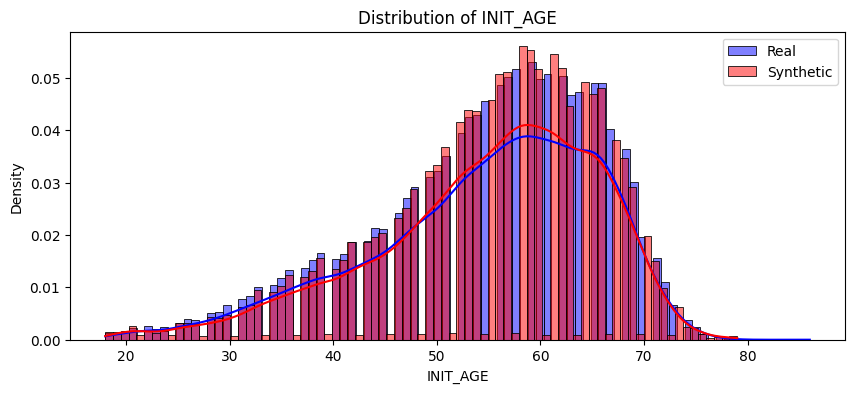


--- INIT_BMI_CALC ---
Real Data Statistics:
count    60997.000000
mean        29.333795
std          6.279380
min         15.000000
25%         24.778512
50%         28.505002
75%         33.104986
max         70.180696
Name: INIT_BMI_CALC, dtype: float64

Synthetic Data Statistics:
count    50000.000000
mean        29.269539
std          6.258343
min         15.000000
25%         24.788558
50%         28.409910
75%         32.924058
max         70.180696
Name: INIT_BMI_CALC, dtype: float64
KS test: statistic = 0.0090, p-value = 0.0222


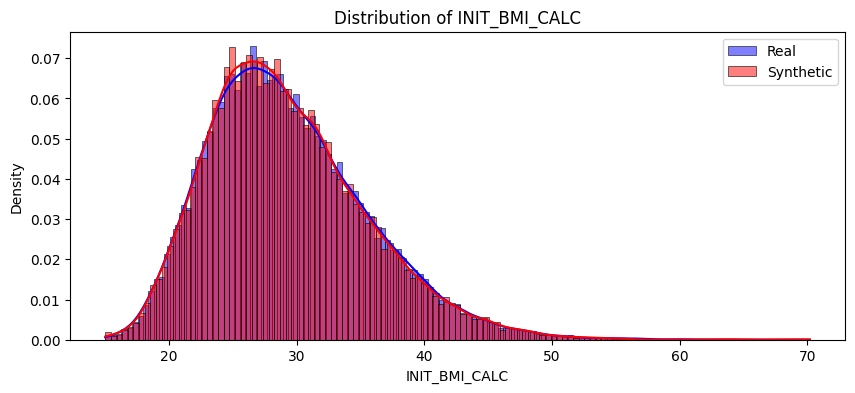


--- INIT_SERUM_SODIUM ---
Real Data Statistics:
count    61089.000000
mean       135.279822
std          4.963048
min        106.000000
25%        132.000000
50%        136.000000
75%        139.000000
max        166.000000
Name: INIT_SERUM_SODIUM, dtype: float64

Synthetic Data Statistics:
count    50000.000000
mean       135.224293
std          4.955769
min        106.000000
25%        132.000000
50%        136.000000
75%        139.000000
max        160.000000
Name: INIT_SERUM_SODIUM, dtype: float64
KS test: statistic = 0.0112, p-value = 0.0021


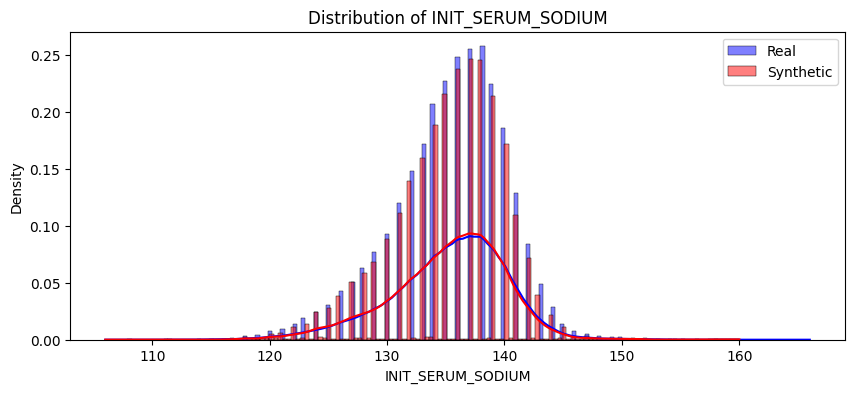


--- INIT_SERUM_CREAT ---
Real Data Statistics:
count    61090.000000
mean         1.567564
std          1.446365
min          0.050000
25%          0.800000
50%          1.080000
75%          1.660000
max         21.900000
Name: INIT_SERUM_CREAT, dtype: float64

Synthetic Data Statistics:
count    50000.000000
mean         1.539761
std          1.418792
min          0.105497
25%          0.800000
50%          1.070000
75%          1.600000
max         21.900000
Name: INIT_SERUM_CREAT, dtype: float64
KS test: statistic = 0.0176, p-value = 0.0000


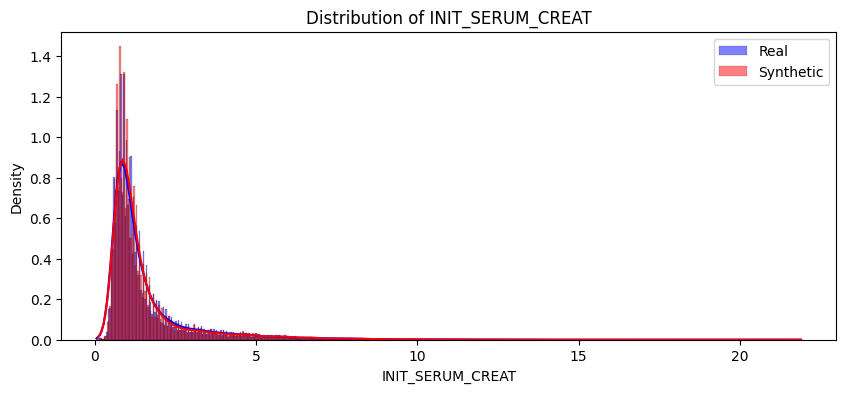


--- INIT_INR ---
Real Data Statistics:
count    61090.000000
mean         1.788898
std          0.853815
min          0.600000
25%          1.300000
50%          1.510000
75%          2.000000
max         43.900000
Name: INIT_INR, dtype: float64

Synthetic Data Statistics:
count    50000.000000
mean         1.780318
std          0.883106
min          0.800000
25%          1.300000
50%          1.500000
75%          2.000000
max         37.853701
Name: INIT_INR, dtype: float64
KS test: statistic = 0.0144, p-value = 0.0000


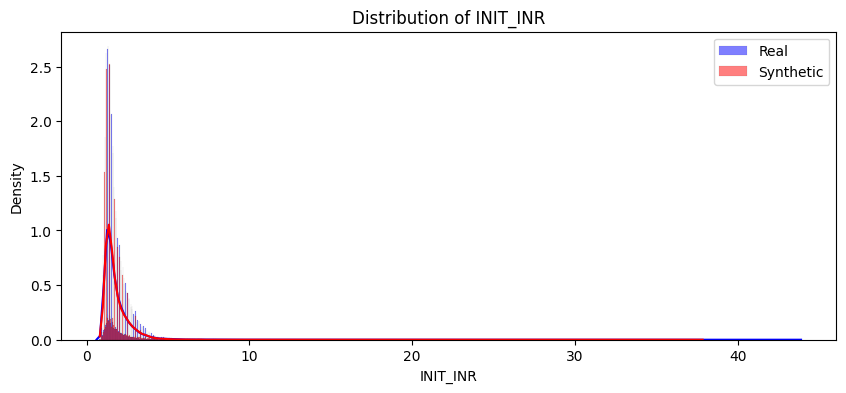


--- INIT_BILIRUBIN ---
Real Data Statistics:
count    61090.000000
mean         7.256704
std          9.411313
min          0.100000
25%          1.700000
50%          3.400000
75%          8.200000
max         86.000000
Name: INIT_BILIRUBIN, dtype: float64

Synthetic Data Statistics:
count    50000.000000
mean         7.205321
std          9.416196
min          0.100000
25%          1.800000
50%          3.315387
75%          7.947362
max         86.000000
Name: INIT_BILIRUBIN, dtype: float64
KS test: statistic = 0.0145, p-value = 0.0000


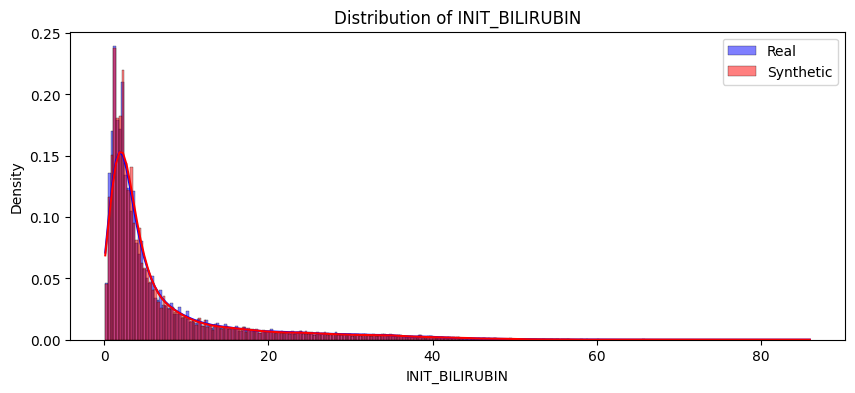


--- INIT_ALBUMIN ---
Real Data Statistics:
count    61090.000000
mean         3.139374
std          0.653907
min          0.500000
25%          2.700000
50%          3.100000
75%          3.600000
max          9.900000
Name: INIT_ALBUMIN, dtype: float64

Synthetic Data Statistics:
count    50000.000000
mean         3.141145
std          0.644015
min          0.500000
25%          2.700000
50%          3.100000
75%          3.567363
max          6.898401
Name: INIT_ALBUMIN, dtype: float64
KS test: statistic = 0.0053, p-value = 0.4199


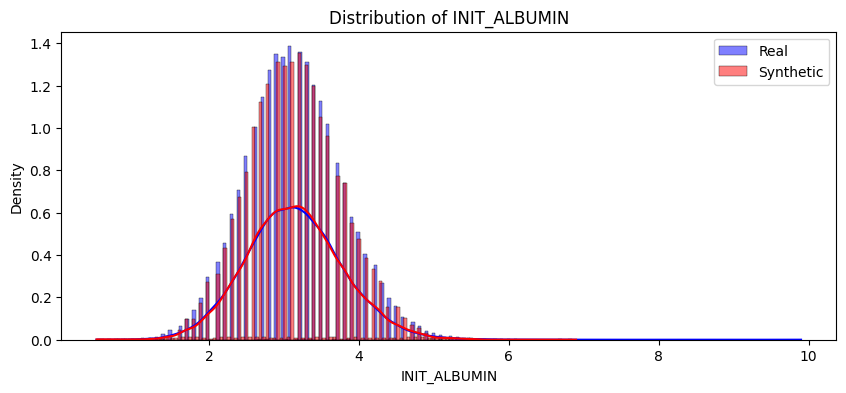


--- INIT_MELD ---
Real Data Statistics:
count    61090.000000
mean        22.348813
std          9.392856
min          6.000000
25%         15.000000
50%         21.000000
75%         29.000000
max         76.000000
Name: INIT_MELD, dtype: float64

Synthetic Data Statistics:
count    50000.000000
mean        22.196675
std          9.105991
min          6.000000
25%         15.000000
50%         21.000000
75%         28.000000
max         49.988532
Name: INIT_MELD, dtype: float64
KS test: statistic = 0.0174, p-value = 0.0000


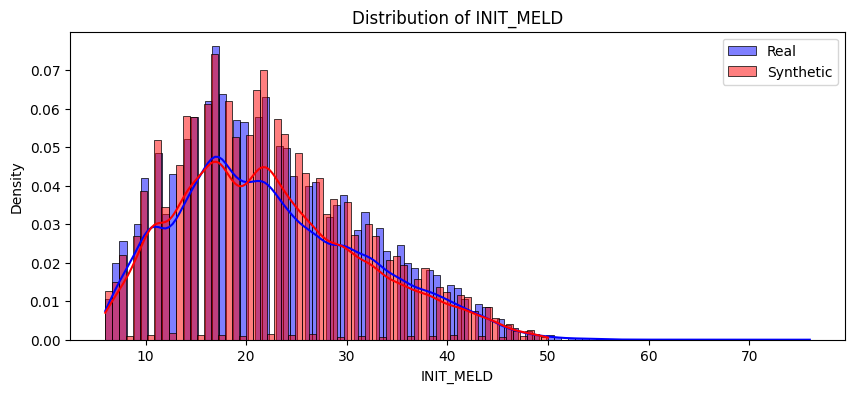


--- time_to_event ---
Real Data Statistics:
count    61092.000000
mean       487.028236
std        723.990837
min          0.000000
25%         15.000000
50%        109.000000
75%        681.000000
max       3032.000000
Name: time_to_event, dtype: float64

Synthetic Data Statistics:
count    50000.000000
mean       474.768497
std        724.492581
min          0.000000
25%         14.000000
50%         98.707179
75%        626.649109
max       2967.000000
Name: time_to_event, dtype: float64
KS test: statistic = 0.0194, p-value = 0.0000


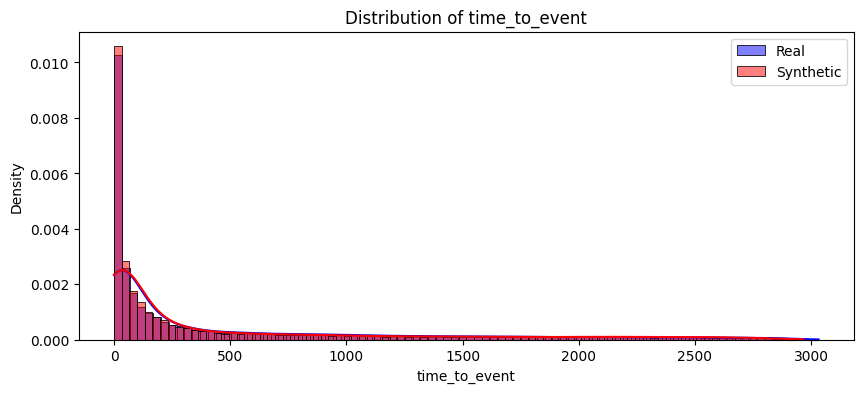


CATEGORICAL VARIABLES COMPARISON

--- GENDER ---

Frequency Table:
         Real  Synthetic
GENDER                  
F       24916      20383
M       36176      29617

Chi-square test: chi2 = 0.0031, p-value = 0.9554


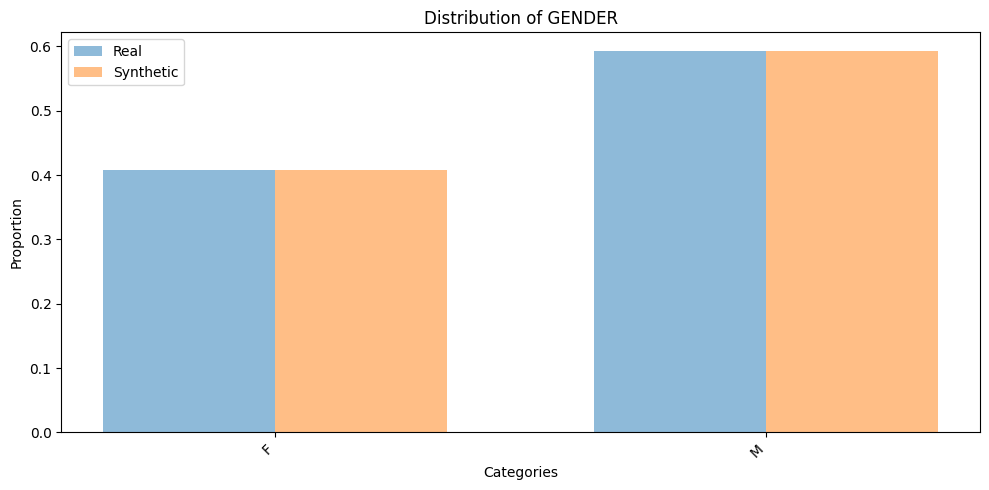


--- ABO ---

Frequency Table:
      Real  Synthetic
ABO                  
A    23149      18788
AB    2405       1173
B     7211       4615
O    28327      25424

Chi-square test: chi2 = 501.8786, p-value = 0.0000


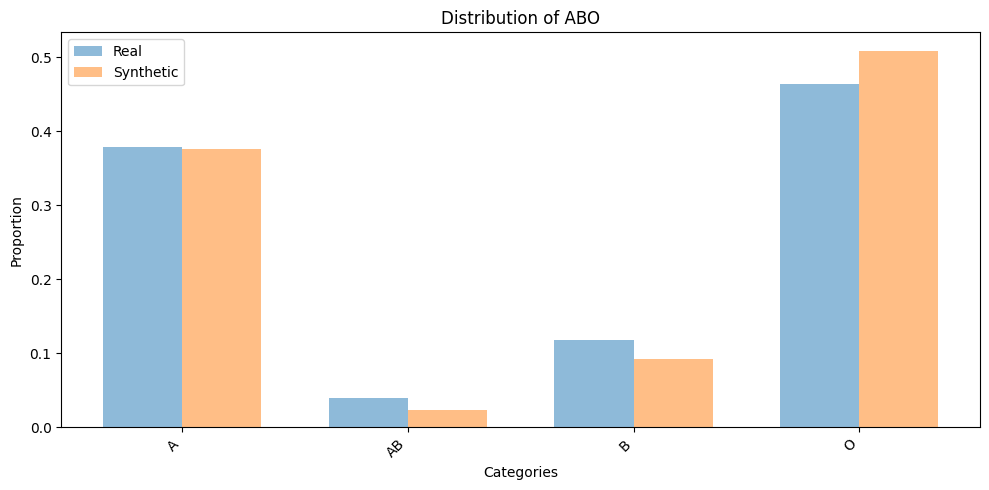


--- Etiology ---

Frequency Table:
              Real  Synthetic
Etiology                     
Alcohol      24536      25073
Autoimmune    2476       1096
Biliary       5653       2912
Cryptogenic   3975       2272
NASH         16669      13459
Other         1406        532
Viral         6377       4656

Chi-square test: chi2 = 1795.4365, p-value = 0.0000


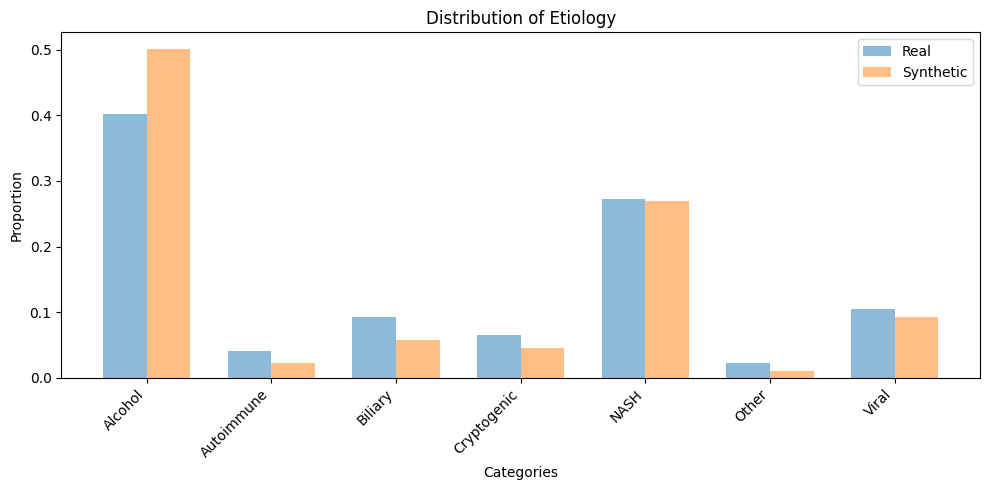


--- Ethnicity ---

Frequency Table:
                                   Real  Synthetic
Ethnicity                                         
American Indian/Alaska Native       641        110
Asian                              1830        614
Black/African American             3806       1973
Hispanic/Latino                   10298       7735
Multiracial                         319         32
Pacific Islander/Native Hawaiian     79          2
Unknown/Not Reported                 24          0
White                             44095      39534

Chi-square test: chi2 = 1413.3576, p-value = 0.0000


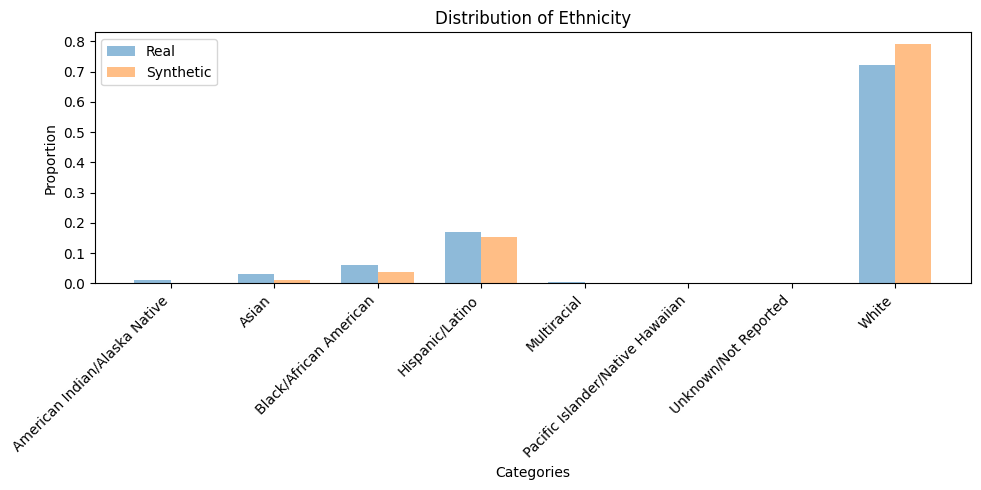


--- diab_group_labeled ---

Frequency Table:
                       Real  Synthetic
diab_group_labeled                    
Diabetes              18051      14957
No Diabetes           42643      34948
Unknown/Not Reported    398         95

Chi-square test: chi2 = 133.2292, p-value = 0.0000


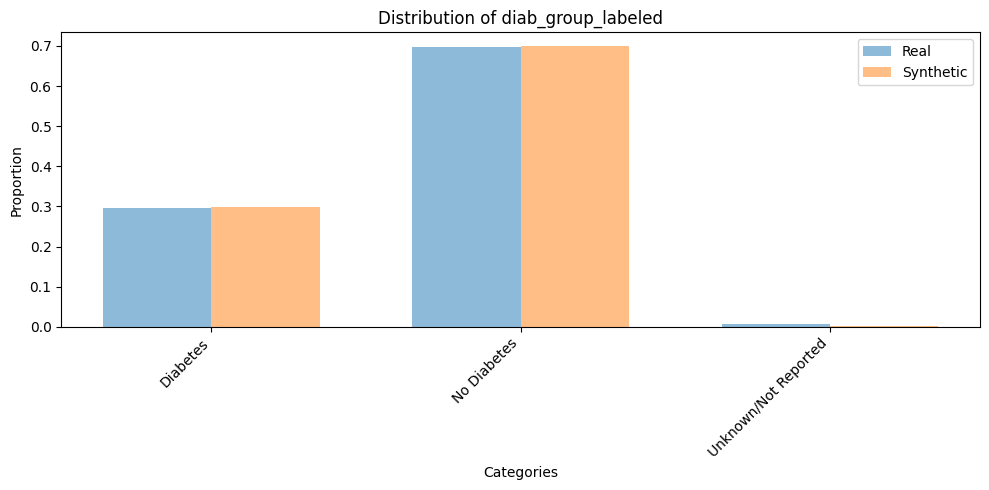


--- Encephalopathy_Status ---

Frequency Table:
                        Real  Synthetic
Encephalopathy_Status                  
Grade 1-2              36407      31086
Grade 3-4               6241       3984
nan                    18444      14930

Chi-square test: chi2 = 182.0178, p-value = 0.0000


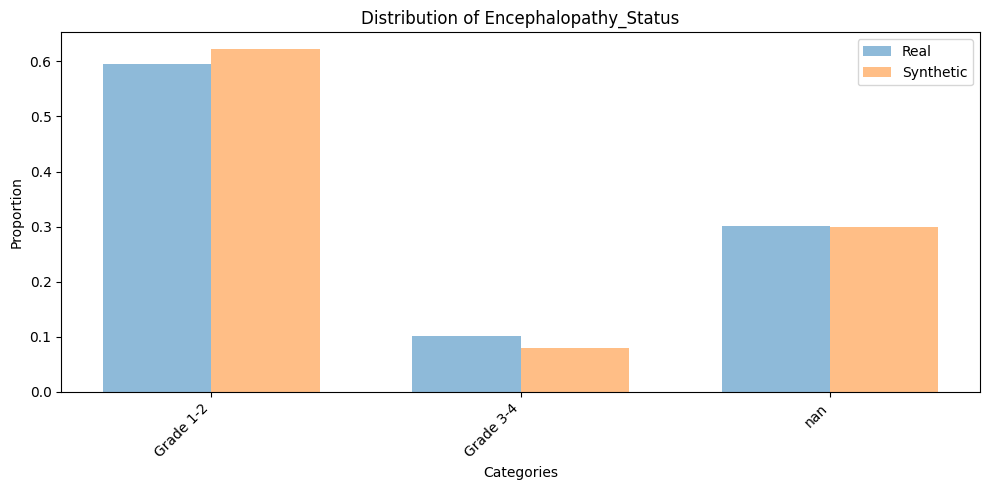


--- Ascites_Status ---

Frequency Table:
                 Real  Synthetic
Ascites_Status                  
Moderate        21109      17084
Slight          30466      26396
nan              9517       6520

Chi-square test: chi2 = 169.7858, p-value = 0.0000


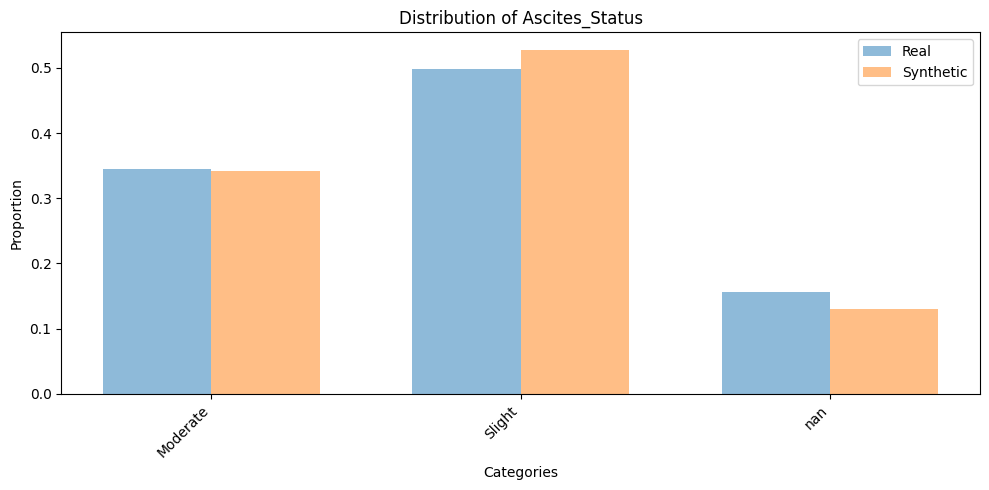


--- INIT_DIALYSIS_PRIOR_WEEK ---

Frequency Table:
                           Real  Synthetic
INIT_DIALYSIS_PRIOR_WEEK                  
A                             2          0
N                         54155      45085
Y                          6935       4915

Chi-square test: chi2 = 68.4866, p-value = 0.0000


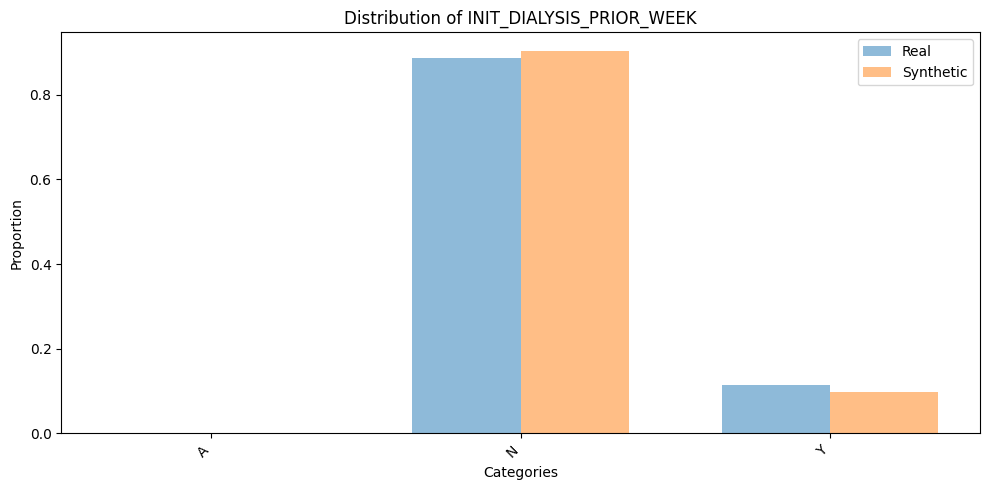


--- outcome_encoded ---

Frequency Table:
                  Real  Synthetic
outcome_encoded                  
0                 9848       8084
1                14062      10567
2                37182      31349

Chi-square test: chi2 = 59.0692, p-value = 0.0000


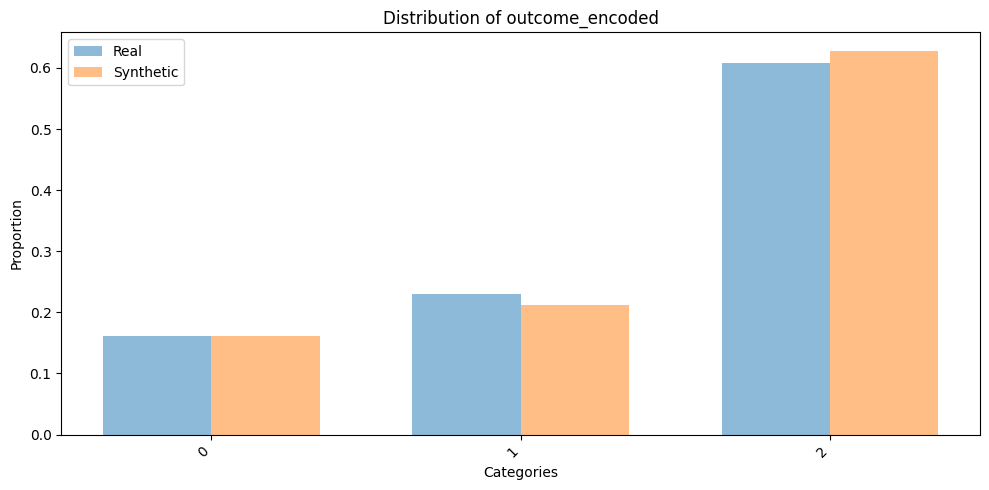

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp, chi2_contingency

def compare_distributions(real_df, syn_df, numerical_cols, categorical_cols):
    # First, align column names
    column_mapping = {
        'INIT_AGENDER': 'GENDER',
        'outcome': 'outcome_encoded'
    }
    syn_df = syn_df.rename(columns=column_mapping)

    # ---------------------------
    # Compare Numerical Variables
    # ---------------------------
    print("=" * 80)
    print("NUMERICAL VARIABLES COMPARISON")
    print("=" * 80)

    for col in numerical_cols:
        if col not in real_df.columns or col not in syn_df.columns:
            print(f"Skipping {col} - not found in both datasets")
            continue

        real_vals = real_df[col].dropna()
        syn_vals = syn_df[col].dropna()
        print(f"\n--- {col} ---")
        print("Real Data Statistics:")
        print(real_vals.describe())
        print("\nSynthetic Data Statistics:")
        print(syn_vals.describe())

        # KS test
        ks_stat, ks_p = ks_2samp(real_vals, syn_vals)
        print(f"KS test: statistic = {ks_stat:.4f}, p-value = {ks_p:.4f}")

        # Plot histograms and KDE
        plt.figure(figsize=(10, 4))
        sns.histplot(real_vals, kde=True, color='blue', label='Real', stat='density', alpha=0.5)
        sns.histplot(syn_vals, kde=True, color='red', label='Synthetic', stat='density', alpha=0.5)
        plt.title(f"Distribution of {col}")
        plt.legend()
        plt.show()

    # ----------------------------
    # Compare Categorical Variables
    # ----------------------------
    print("\n" + "=" * 80)
    print("CATEGORICAL VARIABLES COMPARISON")
    print("=" * 80)

    for col in categorical_cols:
        if col not in real_df.columns or col not in syn_df.columns:
            print(f"Skipping {col} - not found in both datasets")
            continue

        print(f"\n--- {col} ---")

        # Convert to string type to ensure consistent handling
        real_df[col] = real_df[col].astype(str)
        syn_df[col] = syn_df[col].astype(str)

        real_counts = real_df[col].value_counts()
        syn_counts = syn_df[col].value_counts()
        real_props = real_df[col].value_counts(normalize=True)
        syn_props = syn_df[col].value_counts(normalize=True)

        # Create a combined frequency table with all categories
        all_categories = sorted(set(real_counts.index).union(syn_counts.index))
        freq_table = pd.DataFrame({
            'Real': real_counts.reindex(all_categories, fill_value=0),
            'Synthetic': syn_counts.reindex(all_categories, fill_value=0)
        })

        print("\nFrequency Table:")
        print(freq_table)

        # Chi-square test on the frequency table
        try:
            chi2, p_val, dof, expected = chi2_contingency(freq_table.T)
            print(f"\nChi-square test: chi2 = {chi2:.4f}, p-value = {p_val:.4f}")
        except:
            print("\nCould not perform chi-square test")

        # Plot proportions as a bar chart
        plt.figure(figsize=(10, 5))
        props_table = pd.DataFrame({
            'Real': real_props.reindex(all_categories, fill_value=0),
            'Synthetic': syn_props.reindex(all_categories, fill_value=0)
        })

        # Plot side by side bars
        x = np.arange(len(all_categories))
        width = 0.35
        plt.bar(x - width/2, props_table['Real'], width, label='Real', alpha=0.5)
        plt.bar(x + width/2, props_table['Synthetic'], width, label='Synthetic', alpha=0.5)

        plt.xlabel('Categories')
        plt.ylabel('Proportion')
        plt.title(f'Distribution of {col}')
        plt.xticks(x, all_categories, rotation=45, ha='right')
        plt.legend()
        plt.tight_layout()
        plt.show()

# Define columns
numerical_columns = [
    'INIT_AGE', 'INIT_BMI_CALC', 'INIT_SERUM_SODIUM', 'INIT_SERUM_CREAT',
    'INIT_INR', 'INIT_BILIRUBIN', 'INIT_ALBUMIN', 'INIT_MELD', 'time_to_event'
]

categorical_columns = [
    'GENDER', 'ABO', 'Etiology', 'Ethnicity', 'diab_group_labeled',
    'Encephalopathy_Status', 'Ascites_Status', 'INIT_DIALYSIS_PRIOR_WEEK', 'outcome_encoded'
]

# Compare distributions
compare_distributions(real_df, syn_df, numerical_columns, categorical_columns)

In [ ]:
import numpy as np
from scipy.stats import wasserstein_distance
import torch
from sklearn.preprocessing import MinMaxScaler

def gaussian_kernel(x, y, sigma=1.0):
    """Compute Gaussian kernel between x and y"""
    x_size = x.size(0)
    y_size = y.size(0)
    dim = x.size(1)

    x = x.unsqueeze(1)  # (x_size, 1, dim)
    y = y.unsqueeze(0)  # (1, y_size, dim)

    kernel_input = (x - y).pow(2).sum(2).div(2 * sigma**2)
    return torch.exp(-kernel_input)  # (x_size, y_size)

def compute_mmd(x, y, sigma=1.0):
    """Compute Maximum Mean Discrepancy between x and y"""
    x_kernel = gaussian_kernel(x, x, sigma)
    y_kernel = gaussian_kernel(y, y, sigma)
    xy_kernel = gaussian_kernel(x, y, sigma)

    mmd = x_kernel.mean() + y_kernel.mean() - 2 * xy_kernel.mean()
    return mmd.item()

def calculate_distances(real_df, syn_df, numerical_columns):
    """Calculate Wasserstein distances and MMD for numerical columns"""
    wasserstein_distances = {}
    mmd_scores = {}

    # Calculate Wasserstein distance for each column separately
    for col in numerical_columns:
        # Get the data
        real_vals = real_df[col].values
        syn_vals = syn_df[col].values

        # Scale the data to [0,1]
        scaler = MinMaxScaler()
        real_scaled = scaler.fit_transform(real_vals.reshape(-1, 1)).flatten()
        syn_scaled = scaler.transform(syn_vals.reshape(-1, 1)).flatten()

        # Calculate Wasserstein distance
        w_distance = wasserstein_distance(real_scaled, syn_scaled)
        wasserstein_distances[col] = w_distance

    # Calculate MMD for the combined features
    # First scale all features together
    scaler = MinMaxScaler()

    # Prepare the real and synthetic data
    real_data = np.column_stack([real_df[col].values for col in numerical_columns])
    syn_data = np.column_stack([syn_df[col].values for col in numerical_columns])

    # Scale both datasets
    real_scaled = scaler.fit_transform(real_data)
    syn_scaled = scaler.transform(syn_data)

    # Convert to torch tensors
    real_tensor = torch.FloatTensor(real_scaled)
    syn_tensor = torch.FloatTensor(syn_scaled)

    # Calculate MMD with different kernel widths
    sigmas = [0.1, 1.0, 10.0]
    for sigma in sigmas:
        mmd = compute_mmd(real_tensor, syn_tensor, sigma)
        mmd_scores[f'sigma_{sigma}'] = mmd

    return {
        'wasserstein': wasserstein_distances,
        'mmd': mmd_scores
    }

# Calculate and display results
distances = calculate_distances(real_df, syn_df, numerical_columns)

# Print results
print("\nWasserstein Distances:")
print("-" * 50)
for col, dist in distances['wasserstein'].items():
    print(f"{col:20s}: {dist:.6f}")

print("\nMMD Scores with different kernel widths:")
print("-" * 50)
for sigma, score in distances['mmd'].items():
    print(f"MMD ({sigma:12s}): {score:.6f}")

# Visualize Wasserstein distances
plt.figure(figsize=(15, 6))
bars = plt.bar(distances['wasserstein'].keys(), distances['wasserstein'].values())
plt.xticks(rotation=45, ha='right')
plt.title('Wasserstein Distances by Feature')
plt.ylabel('Wasserstein Distance')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
# Create CatBoost config directory and file
import json
from pathlib import Path

# Create directory structure
config_dir = Path("/content/meld_gen/tuned_models/catboost")
config_dir.mkdir(parents=True, exist_ok=True)

# CatBoost configuration matching the evaluation code
catboost_config = {
    # Core parameters
    "iterations": 1000,
    "learning_rate": 0.1,
    "depth": 6,
    "l2_leaf_reg": 3,

    # Training parameters
    "verbose": False,
    "task_type": "GPU",
    "devices": "0",
    "bootstrap_type": "Bernoulli",
    "subsample": 0.8,

    # Early stopping
    "early_stopping_rounds": 50,
    "use_best_model": True,

    # Custom metrics will be set in the code based on task type
    # loss_function and eval_metric are set in the code
    # cat_features will be set automatically based on data
}

# Save the configuration
with open(config_dir / "meld_cv.json", "w") as f:
    json.dump(catboost_config, f, indent=2)

print("CatBoost configuration created at:", config_dir / "meld_cv.json")
print("\nConfiguration Summary:")
print(json.dumps(catboost_config, indent=2))
print("\nNow you can run the evaluation again using:")
print("!python scripts/pipeline.py --config exp/meld/config.toml --eval")

CatBoost configuration created at: /content/meld_gen/tuned_models/catboost/meld_cv.json

Configuration Summary:
{
  "iterations": 1000,
  "learning_rate": 0.1,
  "depth": 6,
  "l2_leaf_reg": 3,
  "verbose": false,
  "task_type": "GPU",
  "devices": "0",
  "bootstrap_type": "Bernoulli",
  "subsample": 0.8,
  "early_stopping_rounds": 50,
  "use_best_model": true
}

Now you can run the evaluation again using:
!python scripts/pipeline.py --config exp/meld/config.toml --eval


In [ ]:
!python scripts/pipeline.py --config exp/meld/config.toml --eval

----------------------------------------------------------------------------------------------------
loading synthetic data: exp/meld/check
Train size: (50000, 42), Val size (4033, 42)
{'seed': 0, 'normalization': None, 'num_nan_policy': None, 'cat_nan_policy': None, 'cat_min_frequency': None, 'cat_encoding': 'one-hot', 'y_policy': 'default'}
{'bootstrap_type': 'Bernoulli',
 'cat_features': [],
 'depth': 6,
 'devices': '0',
 'early_stopping_rounds': 50,
 'iterations': 1000,
 'l2_leaf_reg': 3,
 'learning_rate': 0.1,
 'subsample': 0.8,
 'task_type': 'GPU',
 'use_best_model': True,
 'verbose': False}
----------------------------------------------------------------------------------------------------
Traceback (most recent call last):
  File "/content/meld_gen/scripts/pipeline.py", line 121, in <module>
    main()
  File "/content/meld_gen/scripts/pipeline.py", line 90, in main
    train_catboost(
  File "/content/meld_gen/scripts/eval_catboost.py", line 124, in train_catboost
    model.fi

In [ ]:
# Load and combine synthetic data
import numpy as np
import pandas as pd
from pathlib import Path

# Define paths
synthetic_path = Path("/content/meld_gen/exp/meld/check")
data_dir = Path("/content/meld_gen/data/meld")

# Load synthetic data
X_num = np.load(synthetic_path / "X_num_train.npy")
y = np.load(synthetic_path / "y_train.npy")

# Load original column names from info.json
import json
with open(data_dir / "info.json", "r") as f:
    info = json.load(f)

# Create DataFrame with proper column names
synthetic_df = pd.DataFrame(X_num, columns=info['numerical_columns'])
synthetic_df['outcome'] = y

# Save to CSV
output_path = synthetic_path / "synthetic_data.csv"
synthetic_df.to_csv(output_path, index=False)

print(f"Synthetic data saved to: {output_path}")
print(f"Shape: {synthetic_df.shape}")
print("\nFirst few rows:")
print(synthetic_df.head())

# In Colab, you can download using:
from google.colab import files
files.download(str(output_path))

In [ ]:
syn_df = pd.read_csv('/content/synthetic_data.csv')

In [ ]:
df

In [ ]:
syn_df

NUMERICAL VARIABLES COMPARISON

Statistical Comparison:
                   Real_Mean  Syn_Mean  Real_Std  Syn_Std  Real_Median  \
INIT_AGE              54.699    54.902    11.048   10.873       57.000   
INIT_BMI_CALC         29.334    29.290     6.279    6.253       28.505   
INIT_SERUM_SODIUM    135.280   135.202     4.963    5.043      136.000   
INIT_SERUM_CREAT       1.568     1.556     1.446    1.455        1.080   
INIT_INR               1.789     1.785     0.854    0.814        1.510   
INIT_BILIRUBIN         7.257     7.270     9.411    9.595        3.400   
INIT_ALBUMIN           3.139     3.139     0.654    0.646        3.100   
INIT_MELD             22.349    22.351     9.393    9.133       21.000   
time_to_event        487.028   473.548   723.991  719.303      109.000   

                   Syn_Median  KS_Statistic  KS_p_value  
INIT_AGE               57.000         0.011       0.004  
INIT_BMI_CALC          28.412           NaN         NaN  
INIT_SERUM_SODIUM     136.000

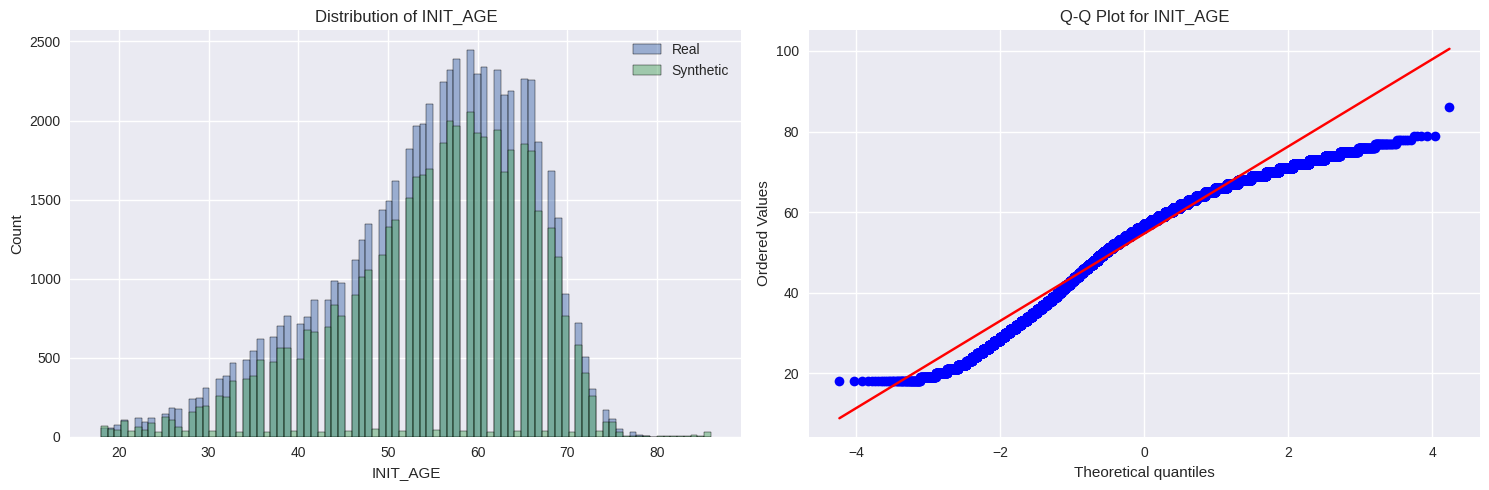


INIT_AGE Range Comparison:
Real: [18.00, 86.00]
Synthetic: [18.00, 86.00]


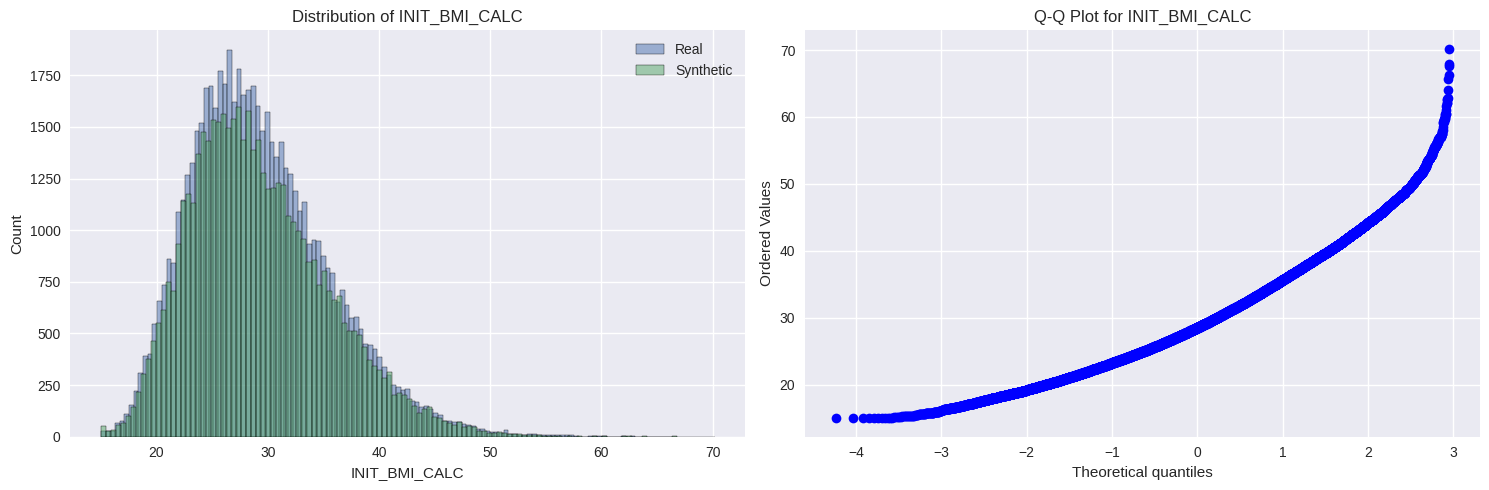


INIT_BMI_CALC Range Comparison:
Real: [15.00, 70.18]
Synthetic: [15.00, 66.85]


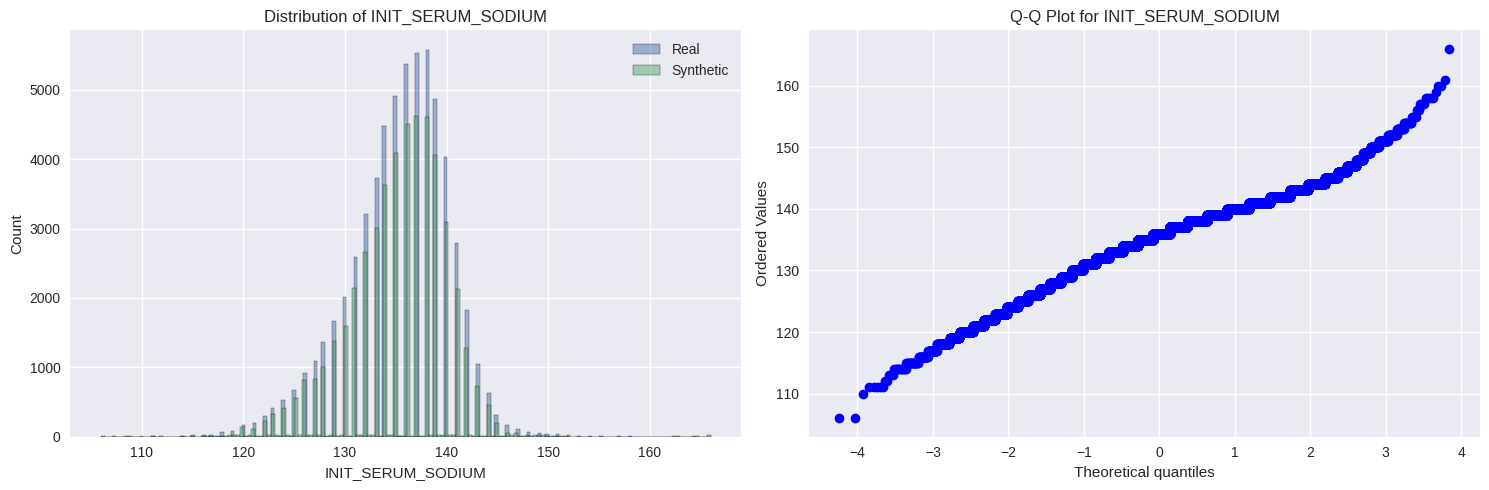


INIT_SERUM_SODIUM Range Comparison:
Real: [106.00, 166.00]
Synthetic: [106.00, 166.00]


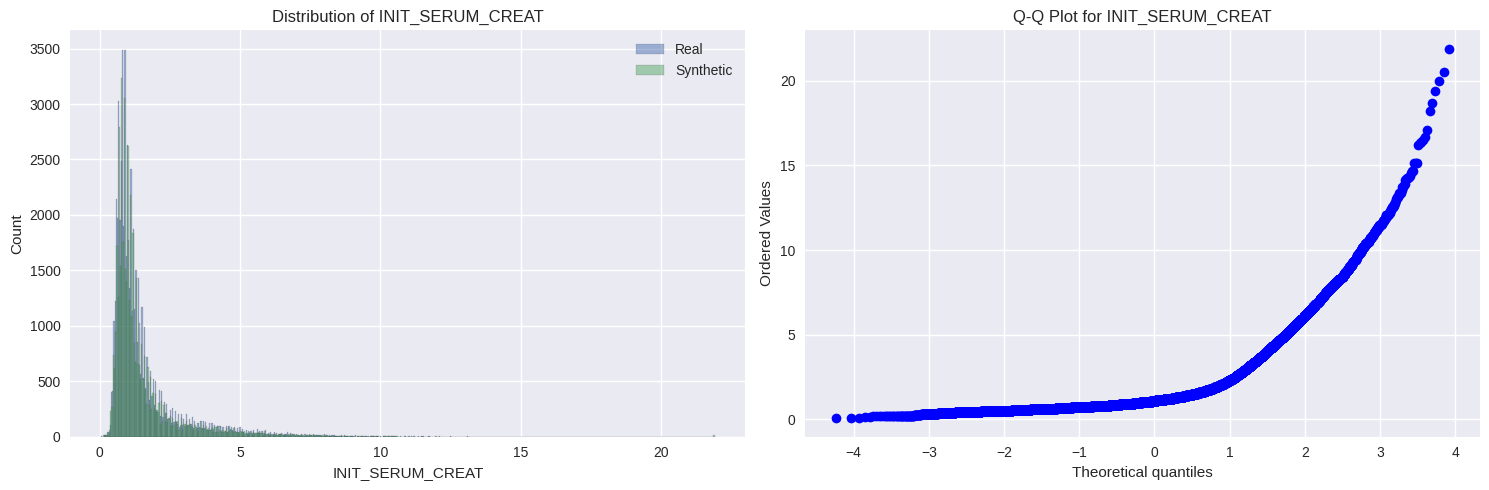


INIT_SERUM_CREAT Range Comparison:
Real: [0.05, 21.90]
Synthetic: [0.11, 21.90]


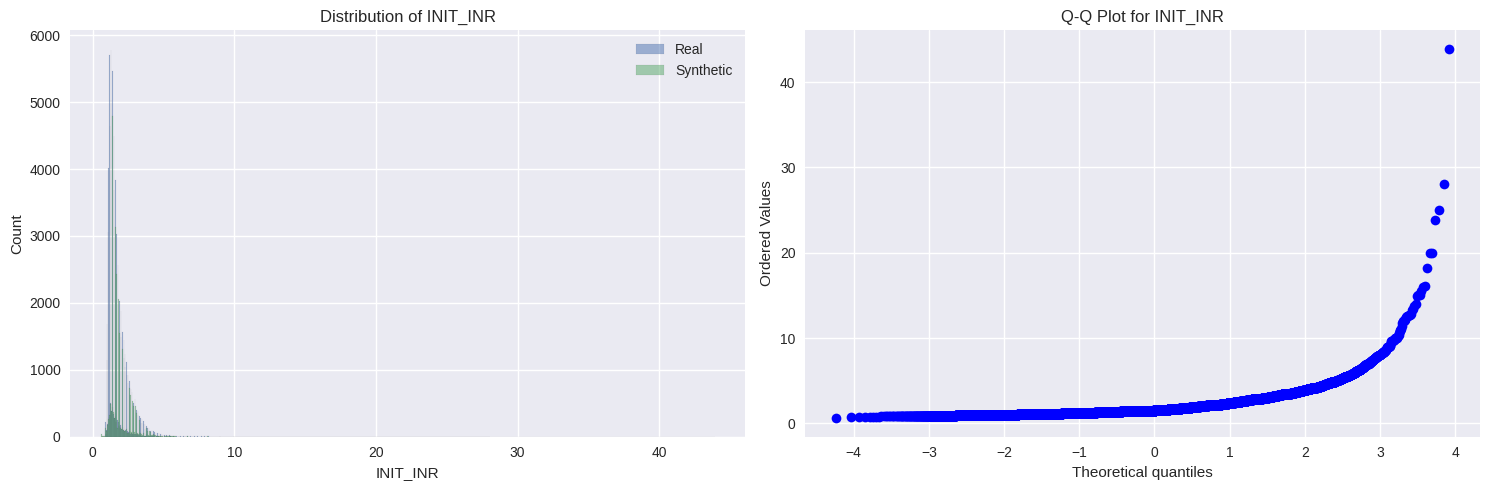


INIT_INR Range Comparison:
Real: [0.60, 43.90]
Synthetic: [0.60, 28.07]


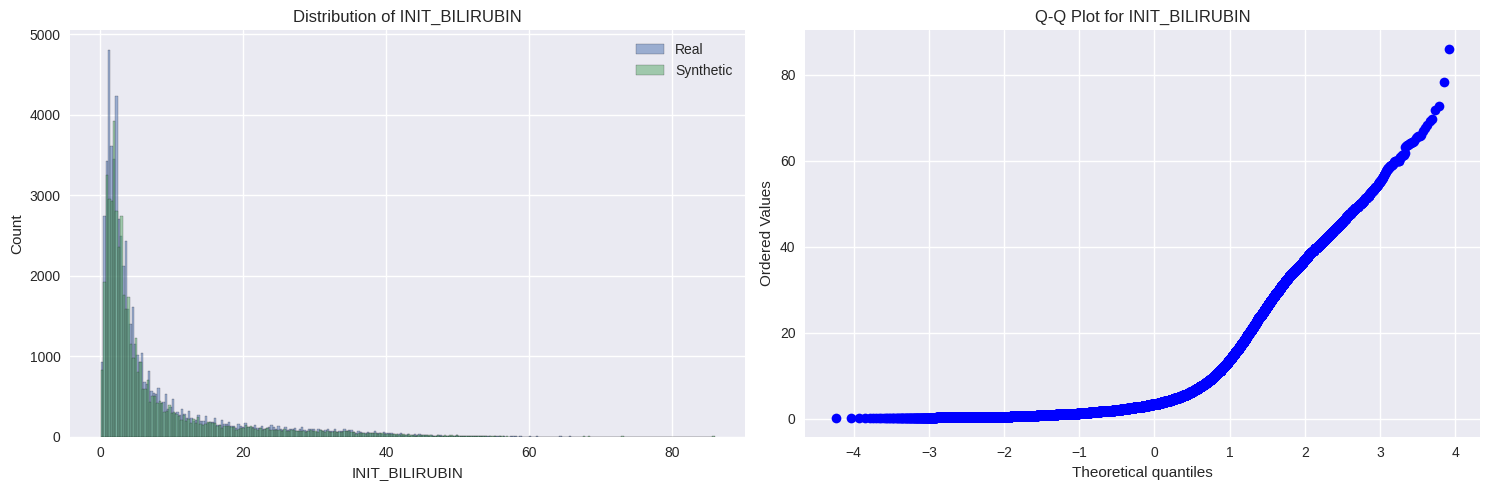


INIT_BILIRUBIN Range Comparison:
Real: [0.10, 86.00]
Synthetic: [0.10, 86.00]


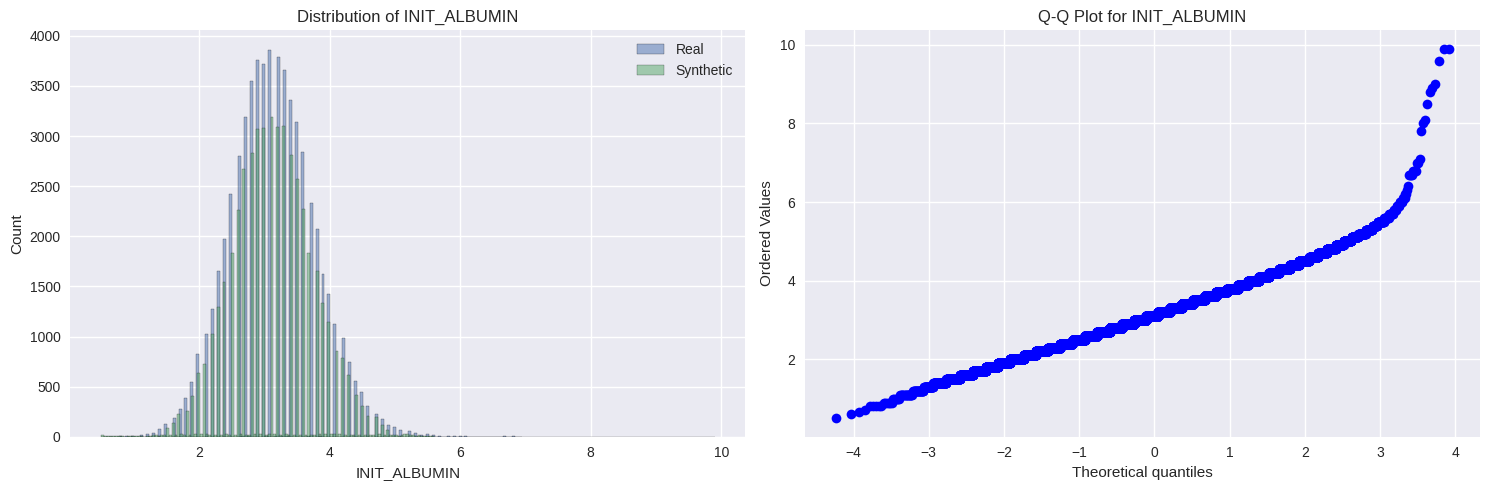


INIT_ALBUMIN Range Comparison:
Real: [0.50, 9.90]
Synthetic: [0.50, 6.95]


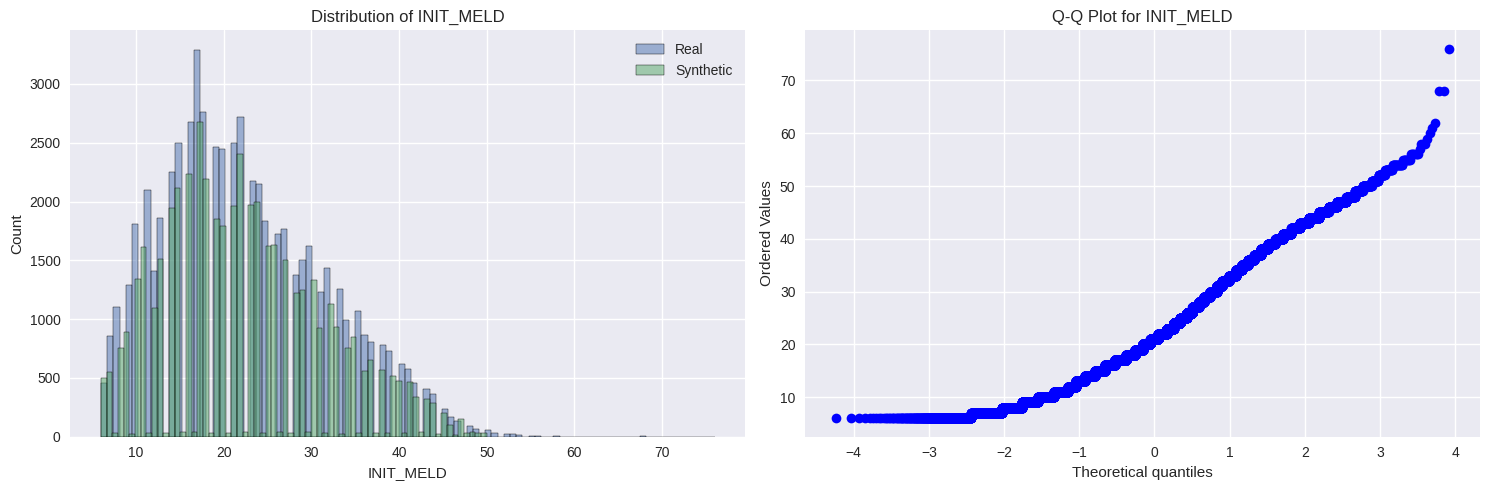


INIT_MELD Range Comparison:
Real: [6.00, 76.00]
Synthetic: [6.00, 49.99]


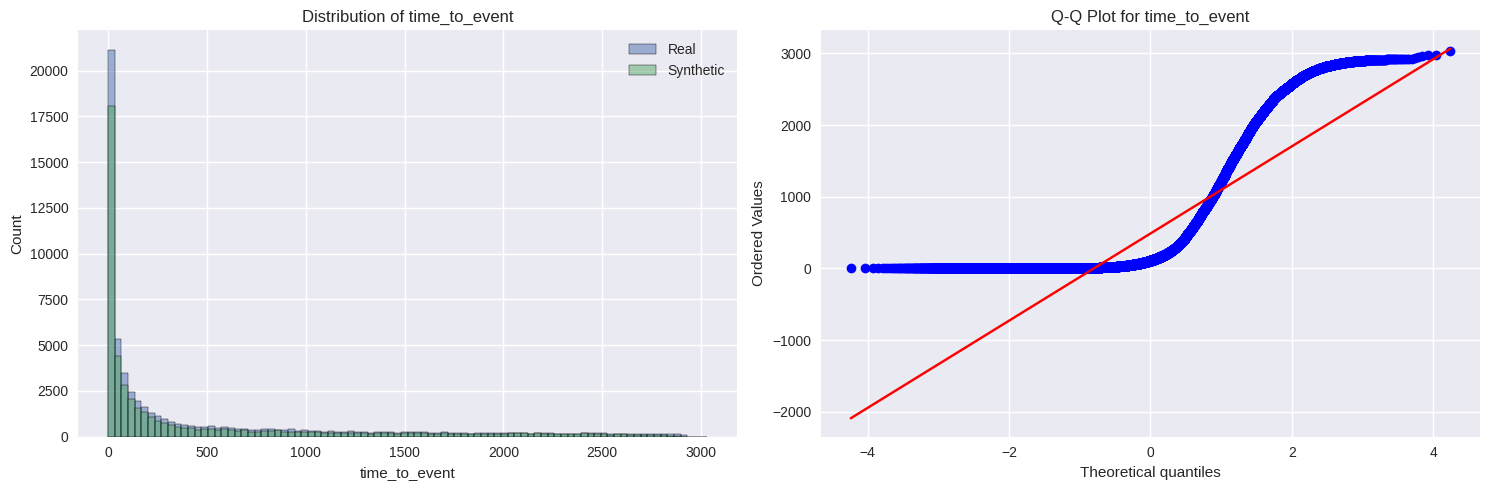


time_to_event Range Comparison:
Real: [0.00, 3032.00]
Synthetic: [0.00, 3032.00]

CORRELATION COMPARISON


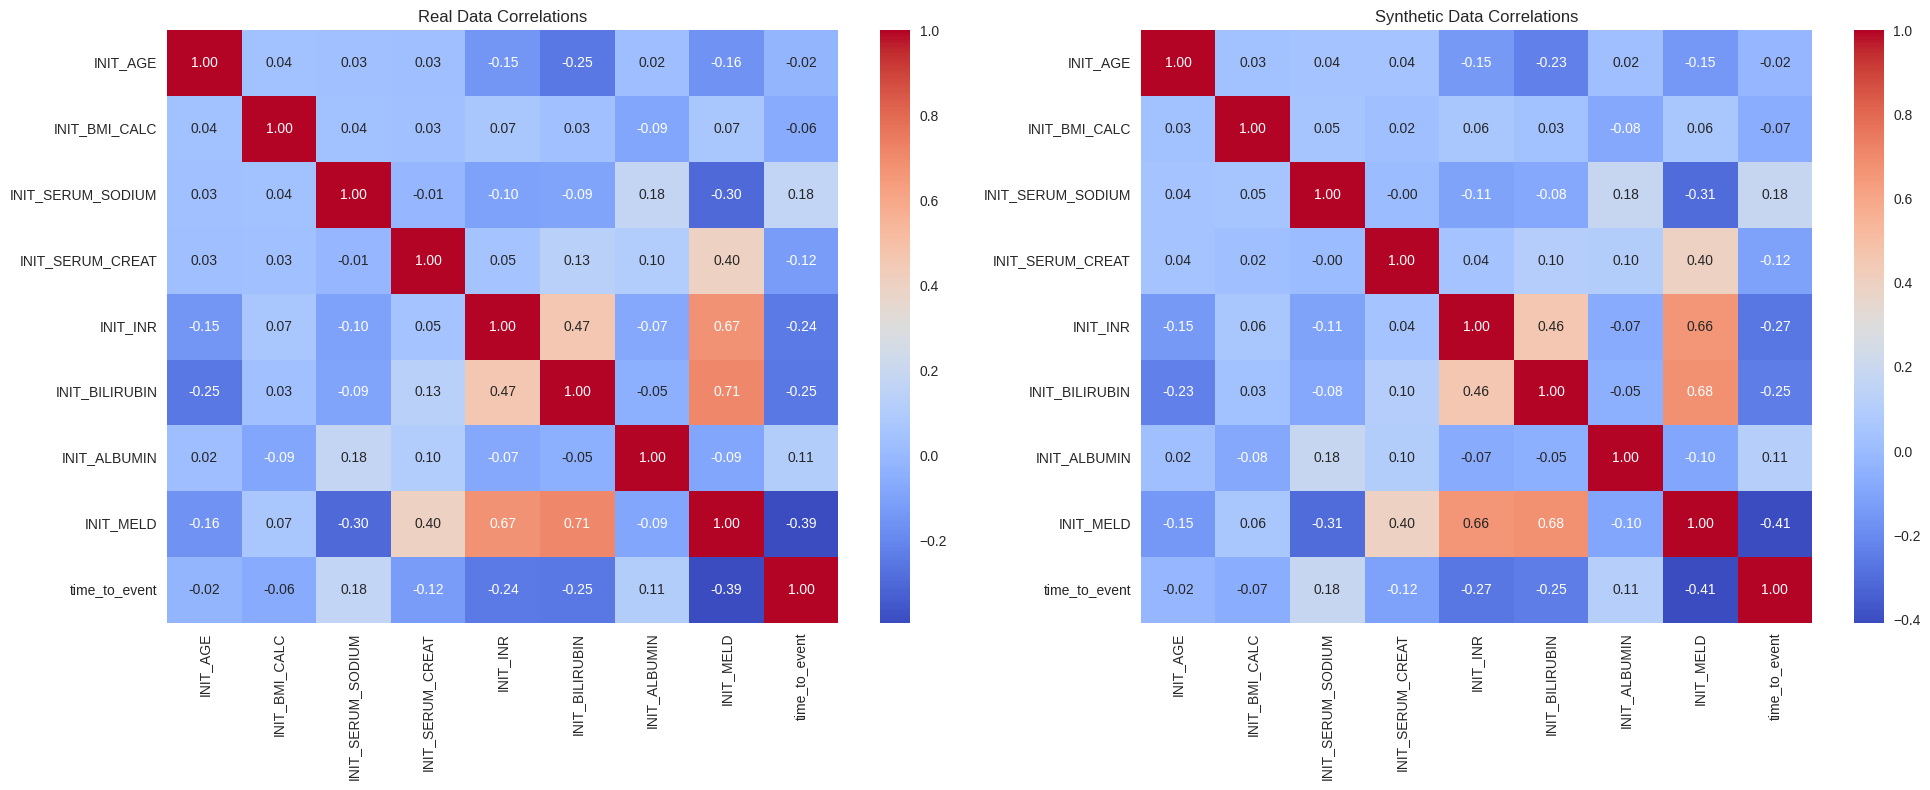


CATEGORICAL VARIABLES COMPARISON


KeyError: 'GENDER'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

def compare_distributions(real_df, syn_df, numerical_cols=None, categorical_cols=None):
    """
    Comprehensive comparison of distributions between real and synthetic data
    """
    if numerical_cols is None:
        numerical_cols = real_df.select_dtypes(include=[np.number]).columns

    if categorical_cols is None:
        categorical_cols = real_df.select_dtypes(include=['object', 'category']).columns

    # Set up the plotting style
    plt.style.use('seaborn-v0_8')

    # 1. Statistical Summary for Numerical Variables
    print("="*80)
    print("NUMERICAL VARIABLES COMPARISON")
    print("="*80)

    stats_comparison = pd.DataFrame()
    for col in numerical_cols:
        real_stats = real_df[col].describe()
        syn_stats = syn_df[col].describe()

        # Calculate additional statistics
        ks_stat, p_value = stats.ks_2samp(real_df[col], syn_df[col])
        stats_dict = {
            'Real_Mean': real_stats['mean'],
            'Syn_Mean': syn_stats['mean'],
            'Real_Std': real_stats['std'],
            'Syn_Std': syn_stats['std'],
            'Real_Median': real_stats['50%'],
            'Syn_Median': syn_stats['50%'],
            'KS_Statistic': ks_stat,
            'KS_p_value': p_value
        }
        stats_comparison = pd.concat([stats_comparison,
                                    pd.DataFrame(stats_dict, index=[col])])

    # Print statistical comparison
    pd.set_option('display.float_format', lambda x: '%.3f' % x)
    print("\nStatistical Comparison:")
    print(stats_comparison)

    # 2. Visual Comparison - Numerical Variables
    for col in numerical_cols:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

        # Histogram
        sns.histplot(data=real_df, x=col, alpha=0.5, label='Real', ax=ax1)
        sns.histplot(data=syn_df, x=col, alpha=0.5, label='Synthetic', ax=ax1)
        ax1.set_title(f'Distribution of {col}')
        ax1.legend()

        # Q-Q Plot
        stats.probplot(real_df[col], dist="norm", plot=ax2)
        ax2.set_title(f'Q-Q Plot for {col}')

        plt.tight_layout()
        plt.show()

        # Print range comparison
        print(f"\n{col} Range Comparison:")
        print(f"Real: [{real_df[col].min():.2f}, {real_df[col].max():.2f}]")
        print(f"Synthetic: [{syn_df[col].min():.2f}, {syn_df[col].max():.2f}]")

    # 3. Correlation Matrix Comparison
    print("\n" + "="*80)
    print("CORRELATION COMPARISON")
    print("="*80)

    real_corr = real_df[numerical_cols].corr()
    syn_corr = syn_df[numerical_cols].corr()

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    sns.heatmap(real_corr, annot=True, fmt='.2f', ax=ax1, cmap='coolwarm')
    ax1.set_title('Real Data Correlations')

    sns.heatmap(syn_corr, annot=True, fmt='.2f', ax=ax2, cmap='coolwarm')
    ax2.set_title('Synthetic Data Correlations')

    plt.tight_layout()
    plt.show()

    # 4. Categorical Variables Comparison (if any)
    if len(categorical_cols) > 0:
        print("\n" + "="*80)
        print("CATEGORICAL VARIABLES COMPARISON")
        print("="*80)

        for col in categorical_cols:
            real_prop = real_df[col].value_counts(normalize=True)
            syn_prop = syn_df[col].value_counts(normalize=True)

            print(f"\n{col} Proportions:")
            comparison = pd.DataFrame({
                'Real': real_prop,
                'Synthetic': syn_prop
            }).fillna(0)

            print(comparison)

            # Chi-square test
            chi2, p_value = stats.chi2_contingency(
                pd.crosstab(real_df[col], columns=['Real'])[:1],
                pd.crosstab(syn_df[col], columns=['Synthetic'])[:1]
            )[:2]

            print(f"\nChi-square test: statistic={chi2:.3f}, p-value={p_value:.3f}")

# Usage example:

compare_distributions(
    real_df=df,  # Original dataframe
    syn_df=syn_df,  # Synthetic dataframe
    numerical_cols=['INIT_AGE', 'INIT_BMI_CALC', 'INIT_SERUM_SODIUM', 'INIT_SERUM_CREAT',
                   'INIT_INR', 'INIT_BILIRUBIN', 'INIT_ALBUMIN', 'INIT_MELD', 'time_to_event'],
        categorical_cols=['GENDER', 'ABO', 'Etiology', 'Ethnicity',
       'diab_group_labeled', 'Encephalopathy_Status', 'Ascites_Status',
       'INIT_DIALYSIS_PRIOR_WEEK','outcome_encoded']
)

In [ ]:
from google.colab import auth
auth.authenticate_user()

# Clone your repo if you haven't already
!git clone https://github.com/chahn85/UNOS_Synthetic

Cloning into 'UNOS_Synthetic'...
